In [1]:
import sys
sys.path.append("../scripts")
from robot import *
from scipy.stats import multivariate_normal

In [2]:
class Particle:
    def __init__(self,init_pose):
        self.pose = init_pose


In [3]:
class Mcl:
    def __init__(self,init_pose,num,motion_noise_stds):
        self.particles=[Particle(init_pose) for i in range(num)]
        v= motion_noise_stds
        c= np.diag([v["nn"]**2,v["no"]**2,v["on"]**2,v["oo"]**2])
        self.motion_noise_rate_pdf = multivariate_normal(cov=c)
        
    def motion_update(self, nu,omega, time):
        print(self.motion_noise_rate_pdf.cov)
        
    def draw(self,ax,elems):
        xs = [p.pose[0] for p in self.particles]
        ys = [p.pose[1] for p in self.particles]
        vxs=[math.cos(p.pose[2]) for p in self.particles]
        vys=[math.sin(p.pose[2]) for p in self.particles]
        elems.append(ax.quiver(xs,ys,vxs,vys,color="blue",alpha=0.5))

In [4]:
class EstimationAgent(Agent):
    def __init__(self,time_interval,nu,omega,estimator):
        super().__init__(nu,omega)
        self.time_interval= time_interval
        self.estimator = estimator
    
    def draw(self,ax,elems):
        self.estimator.draw(ax,elems)
        

In [5]:
initial_pose = np.array([0,0,0]).T
estimator = Mcl(initial_pose,100, motion_noise_stds={"nn":0.01,"no":0.02,"on":0.03,"oo":0.04})

circling =EstimationAgent(0.1,0.2,10.0/180*math.pi,estimator)
estimator.motion_update(0.2,10.0/180*math.pi,0.1)


[[0.0001 0.     0.     0.    ]
 [0.     0.0004 0.     0.    ]
 [0.     0.     0.0009 0.    ]
 [0.     0.     0.     0.0016]]


<IPython.core.display.Javascript object>


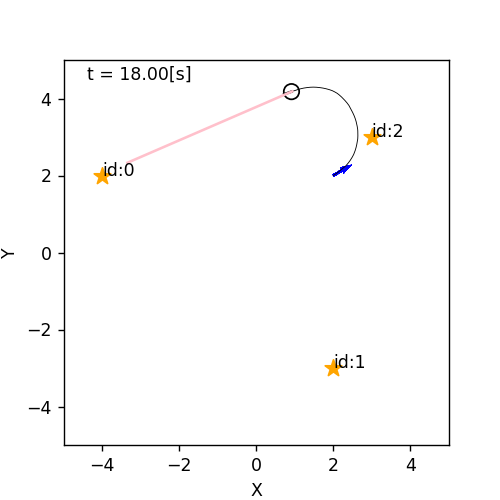

In [9]:
world =VWorld(30,0.1)

m = Map()                                  
m.append_landmark(Landmark(-4,2))
m.append_landmark(Landmark(2,-3))
m.append_landmark(Landmark(3,3))
world.append(m)  

initial_pose= np.array([2,2,math.pi/6]).T

estimator= Mcl(initial_pose,100,motion_noise_stds ={"nn":0.19, "no":0.001, "on":0.13, "oo":0.2})

circling =EstimationAgent(0.1,0.2,10.0/180*math.pi,estimator)
r= Robot(initial_pose,sensor=Camera(m),agent=circling)

world.append(r)
world.draw()
